In [20]:
from typing import List, Tuple, Callable
import random
import matplotlib.pyplot as plt

# Genome and Population Types
Genome = List[str]
Population = List[Genome]


In [2]:
subway_network = {
    "Tacubaya": [("Tacuba", 5), ("Balderas", 6), ("Centro médico", 3), ("Mixcoac", 3)],
    "Balderas": [("Salto del agua", 1), ("Tacubaya", 6), ("Hidalgo", 2), ("Centro médico", 3)],
    "Salto del agua": [("Pino Suárez", 2), ("Balderas", 1), ("Bellas artes", 2), ("Chabacano", 3)],
    "Pino Suárez": [("Candelaria", 2), ("Salto del agua", 2), ("Bellas artes", 3), ("Chabacano", 2)],
    "Candelaria": [("San Lázaro", 1), ("Pino Suárez", 2), ("Morelos", 1), ("Jamaica", 2)],
    "San Lázaro": [("Candelaria", 1), ("Morelos", 1), ("Oceanía", 3), ("Gómez Farías", 4)],
    "Gómez Farías": [("Pantitlán", 2), ("San Lázaro", 4)],
    "Pantitlán": [("Gómez Farías", 2), ("Oceanía", 3), ("Jamaica", 5)],
    "Tasqueña": [("Ermita", 1)],
    "Ermita": [("Zapata", 3),("Atlalilco", 2), ("Chabacano",6)],
    "Chabacano": [("Ermita", 6), ("Centro médico", 2), ("Jamaica", 1), ("Pino Suárez",2)],
    "Bellas Artes": [("Pino Suárez", 3), ("Salto del agua", 2), ("Garibaldi",1), ("Hidalgo",1)],
    "Hidalgo": [("Bellas Artes", 1), ("Guerrero", 1), ("Balderas", 2), ("Tacuba", 7)],
    "Tacuba": [("Cuatro caminos", 1), ("Hidalgo", 7), ("El Rosario", 4), ("Tacubaya", 5)],
    "Cuatro caminos": [("Tacuba", 1)],
    "Universidad": [("Zapata", 2)],
    "Zapata": [("Universidad", 2), ("Ermita",3), ("Mixcoac",3), ("Centro médico",4)],
    "Centro médico":  [("Zapata", 4), ("Tacubaya",3), ("Chabacano",2), ("Balderas",3)],
    "Guerrero":  [("Hidalgo",1 ), ("Garibaldi",1), ("La raza",2)],
    "La raza": [("Guerrero",2 ), ("Consulado", 3), ("Instituto del Petróleo",2), ("Deportivo 18 de Marzo", 2 )],
    "Deportivo 18 de Marzo": [("La raza", 2), ("Indios verdes",1), ("Martín Carrera",2), ("Instituto del Petróleo",2)],
    "Indios verdes": [("Deportivo 18 de Marzo", 2)],
    "Estación IA": [("Atlalilco", 6 ), ("Chabacano",2), ("Jamaica",1)],
    "Jamaica": [("Estación IA",1 ), ("Chabacano",1), ("Candelaria",2), ("Pantitlán", 5)],
    "Morelos": [("Candelaria",1 ), ("San Lázaro",1), ("Garibaldi",3), ("Consulado",2)],
    "Consulado": [("Morelos", 2 ), ("Oceanía", 3), ("La raza",3), ("Martín Carrera",3)],
    "Martín Carrera": [("Consulado", 3 ), ("Deportivo 18 de Marzo",2)],
    "Oceanía": [("Pantitlán", 3 ), ("San Lázaro", 3), ("Ciudad Azteca",1), ("Consulado",3)],
    "Instituto del Petróleo": [("La raza",2 ), ("Politécnico",1), ("Deportivo 18 de Marzo",2), ("El Rosario",6)],
    "El Rosario": [("Instituto del Petróleo", 6), ("Tacuba", 4)],
    "Barranca del muerto": [("Mixcoac",1 )],
    "Mixcoac": [("Barranca del muerto",1 ), ("Zapata",3), ("Tacubaya",3)],
    "Atlalilco": [("Tláhuac",1 ), ("Ermita",2), ("Estación IA",6)],
    "Garibaldi": [("Bellas artes",1 ), ("Guerrero",1), ("Morelos",3)],
    "Ciudad Azteca":[("Oceanía",1 )],
    "Tláhuac": [("Atlalilco",1 )]
}

In [3]:
def generate_route(start_station: str, end_station: str) -> Genome:
    """ Randomly generates a route from start to end station. """
    route = [start_station]
    while route[-1] != end_station:
        next_stops = subway_network.get(route[-1], [])
        if not next_stops:
            break
        next_stop = random.choice(next_stops)[0]
        route.append(next_stop)
    return route

In [4]:
def calculate_fitness(route: Genome, end_station: str) -> int:
    """ Calculates the total travel time for the route, penalizes incomplete routes. """
    time = 0
    for i in range(len(route) - 1):
        for connection in subway_network[route[i]]:
            if connection[0] == route[i + 1]:
                time += connection[1]
                break
        else:
            return float('inf')  # Penalize if route does not connect
    if route[-1] != end_station:
        return float('inf')  # Penalize if route does not reach the end station
    return time

In [5]:
def select_parents(population: Population, fitness_func: Callable[[Genome], int]) -> Tuple[Genome, Genome]:
    """ Selects parent routes based on fitness using tournament selection. """
    def tournament_select():
        contenders = random.sample(population, 3)
        return min(contenders, key=fitness_func)

    return tournament_select(), tournament_select()

In [6]:
def crossover(parent1: Genome, parent2: Genome) -> Tuple[Genome, Genome]:
    """ Combines routes from two parents to create new routes using single point crossover,
    ensuring that the start station remains the same. """
    min_length = min(len(parent1), len(parent2))
    if min_length > 2:
        crossover_point = random.randint(2, min_length - 1)  # Start from index 2 to keep the start station
        child1 = [parent1[0]] + parent1[1:crossover_point] + parent2[crossover_point:]
        child2 = [parent2[0]] + parent2[1:crossover_point] + parent1[crossover_point:]
        return child1, child2
    return parent1, parent2

In [7]:
def mutate(route: Genome, end_station: str, mutation_rate: float = 0.1) -> Genome:
    """ Randomly mutates a route, ensuring that the start station is preserved. """
    if random.random() < mutation_rate:
        if len(route) > 2:
            mutation_point = random.randint(2, len(route) - 1)  # Start from index 2 to keep the start station
            new_subroute = generate_route(route[mutation_point - 1], end_station)
            route = route[:mutation_point - 1] + new_subroute
    return route

In [21]:
def genetic_algorithm(start_station: str, end_station: str, population_size: int, generations: int, mutation_rate: float) -> (list, list):
    """Runs the genetic algorithm to find the best route and records fitness over generations."""
    population = [generate_route(start_station, end_station) for _ in range(population_size)]
    fitness_func = lambda route: calculate_fitness(route, end_station)
    best_fitness_over_time = []

    for generation in range(generations):
        population = sorted(population, key=fitness_func)
        best_route = population[0]
        best_fitness = fitness_func(best_route)
        best_fitness_over_time.append(best_fitness)
        print(f"Generation {generation}, Route taken: {best_route} Best Fitness = {best_fitness}")
            
        if best_fitness == 0:
            break

        new_population = population[:2]  # Elitism: keep the best 2 routes
        while len(new_population) < population_size:
            parent1, parent2 = select_parents(population, fitness_func)
            child1, child2 = crossover(parent1, parent2)
            new_population.extend([mutate(child1, end_station, mutation_rate), mutate(child2, end_station, mutation_rate)])
        population = new_population

    return best_route, best_fitness_over_time

Generation 0, Route taken: ['El Rosario', 'Instituto del Petróleo', 'Deportivo 18 de Marzo', 'Martín Carrera', 'Consulado', 'Oceanía', 'San Lázaro'] Best Fitness = 19
Generation 1, Route taken: ['El Rosario', 'Instituto del Petróleo', 'Deportivo 18 de Marzo', 'Martín Carrera', 'Consulado', 'Oceanía', 'San Lázaro'] Best Fitness = 19
Generation 2, Route taken: ['El Rosario', 'Instituto del Petróleo', 'Deportivo 18 de Marzo', 'Martín Carrera', 'Consulado', 'Oceanía', 'San Lázaro'] Best Fitness = 19
Generation 3, Route taken: ['El Rosario', 'Instituto del Petróleo', 'Deportivo 18 de Marzo', 'Martín Carrera', 'Consulado', 'Oceanía', 'San Lázaro'] Best Fitness = 19
Generation 4, Route taken: ['El Rosario', 'Instituto del Petróleo', 'Deportivo 18 de Marzo', 'Martín Carrera', 'Consulado', 'Oceanía', 'San Lázaro'] Best Fitness = 19
Generation 5, Route taken: ['El Rosario', 'Instituto del Petróleo', 'Deportivo 18 de Marzo', 'Martín Carrera', 'Consulado', 'Oceanía', 'San Lázaro'] Best Fitness = 1

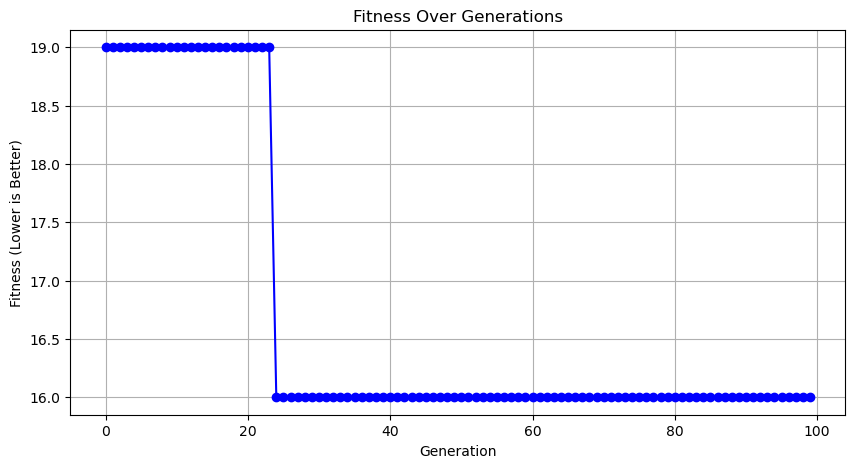

Best Route: ['El Rosario', 'Instituto del Petróleo', 'Deportivo 18 de Marzo', 'Martín Carrera', 'Consulado', 'Morelos', 'San Lázaro']
Travel Time: 16


In [22]:
# Example usage
start_station = "El Rosario"
end_station = "San Lázaro"
best_route, fitness_over_time = genetic_algorithm(start_station, end_station, 30, 100, 0.1)

# Plotting the fitness over generations
plt.figure(figsize=(10, 5))
plt.plot(fitness_over_time, marker='o', linestyle='-', color='b')
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness (Lower is Better)')
plt.grid(True)
plt.show()

print("Best Route:", best_route)
print("Travel Time:", calculate_fitness(best_route, end_station))